In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

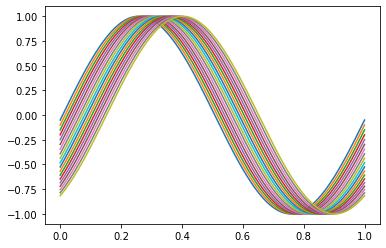

In [5]:
t = np.linspace(0,1,200)
for i in range(1,20):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

In [6]:
np.pi*2

6.283185307179586

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


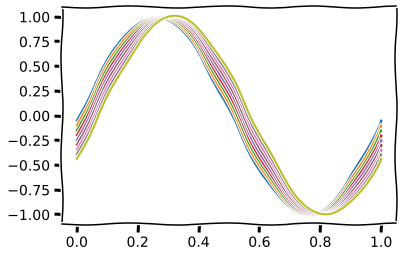

In [7]:
with plt.xkcd():
    for i in range(1,10):
        plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

In [8]:
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [9]:
def factorial_1(n):
    if n > 1:
        return n*factorial_1(n-1)
    else:
        return 1

def factorial_2(n):
    return np.prod(np.arange(1,n+1))

In [11]:
%timeit factorial_1(100)
%timeit factorial_2(100)

14.1 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
6.05 µs ± 464 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


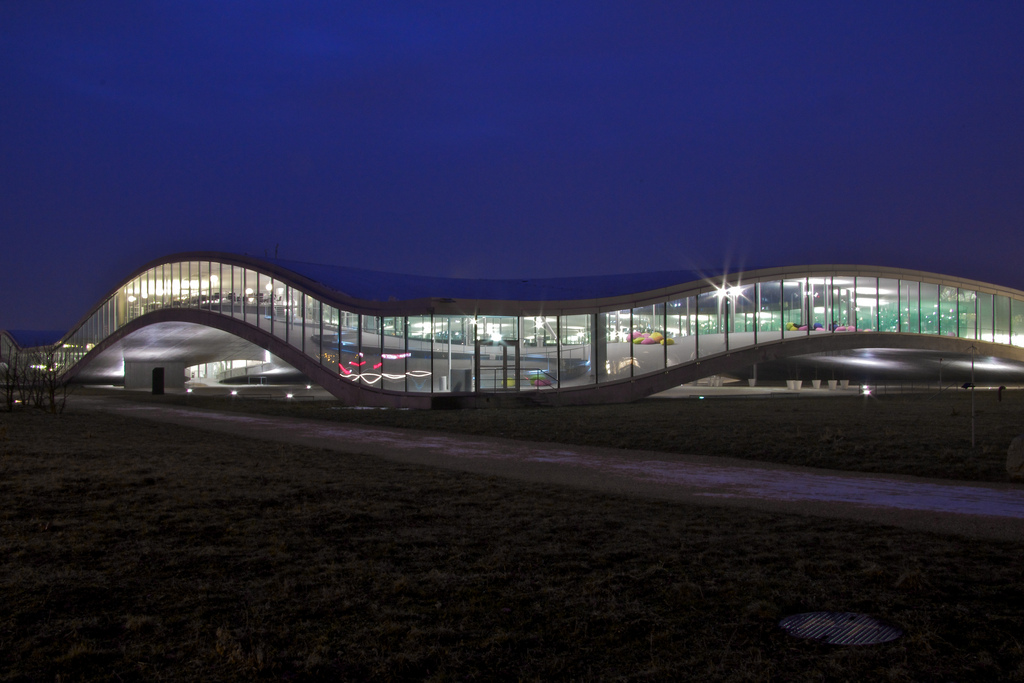

In [12]:
from IPython.display import Image
Image('./Data/rlc.jpg', width=800, height=600)

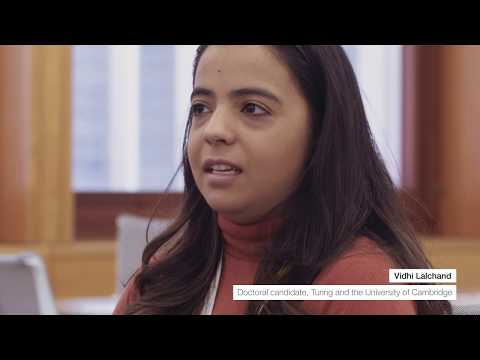

In [14]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=0, seconds=0).total_seconds())
YouTubeVideo("OJy2h9mgiX8", start=start, autoplay=0, theme="light", color="red")

In [15]:
from IPython.display import VimeoVideo
VimeoVideo("12891305")

In [17]:
from IPython.display import IFrame

IFrame('https://dlab.epfl.ch/teaching/fall2019/cs401/', width=800, height=600)

In [19]:
from IPython.lib.display import Audio
from scipy.io import loadmat, wavfile

rate,speech = wavfile.read('Data/german_speech_44100.wav')
_,rir = wavfile.read('Data/RIRs.wav')

print('Speech')
display(Audio(data=speech, rate=rate))
print('Room Impulse Response')
display(Audio(data=rir, rate=rate))

Speech


Room Impulse Response


<function __main__.plot_norm(mean=0, sd=5)>

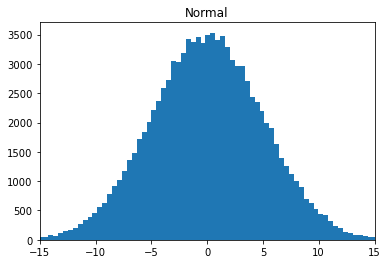

In [26]:
from ipywidgets import interact

def plot_norm(mean=0,sd=5):
    plt.hist(np.random.normal(mean,sd,100000),bins=100)
    plt.xlim(-15,15)
    plt.title("Normal")

interact(plot_norm,means=(-5,5,10),sd=(0,30,5))

In [27]:
from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

In [29]:
N = 500

x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

xx,yy = np.meshgrid(x,y)

d = (xx**2 + yy**2)**0.7 - 4.*np.sin(2*xx) -1.8*np.cos(2*yy)

p = figure(x_range=[-10,10], y_range=[-10,10])
p.image(image=[d], x=[-10], y=[-10], dw=[20], dh=[20], palette="Spectral11")

show(p)

In [30]:
conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [31]:
import seaborn as sns

sns.set_palette("Blues")
sns.set_context("notebook")

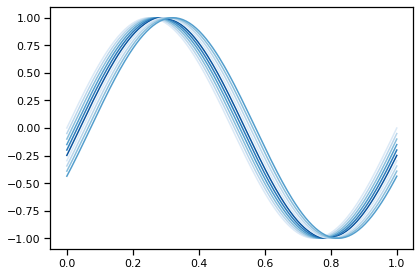

In [32]:
for i in range(0,10):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

plt.tight_layout()

In [33]:
import json
import pandas as pd

In [34]:
tweets_path = './Data/twitter_data.txt'

tweets_data = []

with open(tweets_path, "r") as tweets_file:
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue


In [35]:
tweets_data[0]['text']

'RT @KirkDBorne: Fraud Detection w/ #DeepLearning by @h2oai at Paypal: https://t.co/dh6WhlX75U #BigData #MachineLearning #DataScience https:…'

In [37]:
tweets = pd.DataFrame()

fields = ['text','lang']
for f in fields:
    tweets[f] = list(map(lambda tweet: tweet[f], tweets_data))
    
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place']!=None else None, tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets['time_zone'] = list(map(lambda tweet: tweet['user']['time_zone'], tweets_data))
tweets['text_len'] = list(map(lambda tweet: len(tweet), tweets['text']))

print('We got',len(tweets_data),'tweets.')

We got 10698 tweets.


In [38]:
tweets.head()

text lang country  \
0  RT @KirkDBorne: Fraud Detection w/ #DeepLearni...   en    None   
1  IBM Works With The Weather Company To Track Ea...   en    None   
2  Full issue "Mass Atrocity Prevention" (Part I)...   en    None   
3  rsocrata - Provides easier interaction with So...   en    None   
4  RT @JMiguelLorente: In #HackWeTrust — Sunlight...   en    None   

       username  followers_count                   time_zone  text_len  
0      mejorame              170                      Madrid       140  
1      siprasad              716                   New Delhi       113  
2  CogitatioPaG               48  Pacific Time (US & Canada)       104  
3     oss_rlang                0      Atlantic Time (Canada)       136  
4      OGoov_EU               26  Pacific Time (US & Canada)       127

In [40]:
my_list = [10*x+1 for x in range(10)]
print(my_list)

my_list = list(map(lambda x: x+1, my_list))
print(my_list)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
[2, 12, 22, 32, 42, 52, 62, 72, 82, 92]


In [44]:
import re
re.sub?

Signature: re.sub(pattern, repl, string, count=0, flags=0)
Docstring:
Return the string obtained by replacing the leftmost
non-overlapping occurrences of the pattern in string by the
replacement repl.  repl can be either a string or a callable;
if a string, backslash escapes in it are processed.  If it is
a callable, it's passed the Match object and must return
a replacement string to be used.
File:      ~/anaconda3/envs/ada/lib/python3.8/re.py
Type:      function


In [42]:
re.sub('s+','s','|'.join(['open science','epfl']))

'open science|epfl'

In [46]:
re.sub('s+','s*','|'.join(['open science','epfl']))

'open s*cience|epfl'

In [50]:
def word_in_text(words,text):
    words = re.sub('s+','s*','|'.join(words))
    text = text.lower()
    match = re.search(words,text)
    if match:
        return True
    return False

In [51]:
print(word_in_text(['open science','epfl'],'open science at epfl is great'))
print(word_in_text(['open science','epfl'],'open science is great'))
print(word_in_text(['open science','epfl'],'science is great'))

True
True
False


In [52]:
keywords = ['open access','open science','ipython','open data','reproducible research','epfl']

for w in keywords:
    tweets[w] = tweets['text'].apply(lambda tweet: word_in_text([w],tweet))
    
tweets_by_kw = pd.Series([tweets[w].value_counts()[True] for w in keywords], index=keywords)

In [53]:
tweets_by_kw

open access              289
open science              56
ipython                   11
open data                436
reproducible research     11
epfl                      41
dtype: int64

/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


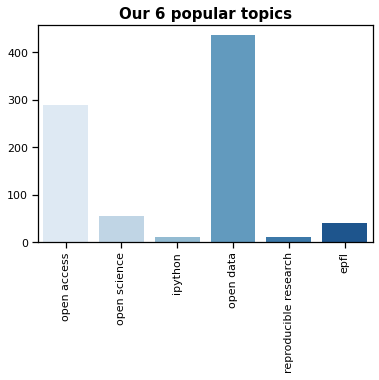

In [60]:
def bar_plot(xlbl, data, n):
    
    fig, ax = plt.subplots()
    ax.set_title('Our ' + str(n) + ' ' + xlbl, fontsize=15, fontweight='bold')
    sns.barplot(data[:n].keys(), data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
bar_plot('popular topics', tweets_by_kw, 6)

In [61]:
tweets['category'] = np.nan
for kw in keywords:
    tweets.loc[tweets[kw] == True, 'category'] = kw


In [62]:
tweets['category'][:10]

0            NaN
1            NaN
2    open access
3      open data
4            NaN
5            NaN
6            NaN
7      open data
8            NaN
9            NaN
Name: category, dtype: object

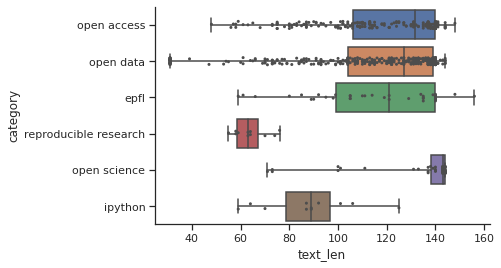

In [63]:
sns.set(style='ticks', color_codes=True)

ax = sns.boxplot(x='text_len', y='category', data=tweets, whis=np.inf)
sns.stripplot(x='text_len', y='category', data=tweets, jitter=True, size=3, color='.3', linewidth=0)

sns.despine(trim=False)